In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd



2023-10-19 20:04:23.657792: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 20:04:23.696099: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 20:04:23.697833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 20:04:24.772260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
pathes = """/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_good.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_LOW_SNR.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_HIGH_RFI.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_BAD_SHAPE.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_NO_SRC.keras""".split('\n')

In [4]:
pathes

['/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_good.keras',
 '/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_LOW_SNR.keras',
 '/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_HIGH_RFI.keras',
 '/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_BAD_SHAPE.keras',
 '/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_NO_SRC.keras']

In [5]:

model_ensemble_files = {}
for file in pathes:
    print(file)
    tagname = file.split('_tag_')[-1].split('.')[0]
    assert tagname, 'tagname can not be empty!'
    model_ensemble_files[tagname] = keras.models.load_model(file)

model_ensemble_files

/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_good.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_LOW_SNR.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_HIGH_RFI.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_BAD_SHAPE.keras
/home/jovyan/skampi-obs-flagging/src/models/20231019_cnn_model_otf_ku_tag_NO_SRC.keras


{'good': <keras.src.engine.sequential.Sequential at 0x7fcd6076ce50>,
 'LOW_SNR': <keras.src.engine.sequential.Sequential at 0x7fcd5c53b9a0>,
 'HIGH_RFI': <keras.src.engine.sequential.Sequential at 0x7fcd5c4fe5f0>,
 'BAD_SHAPE': <keras.src.engine.sequential.Sequential at 0x7fcd6076d9f0>,
 'NO_SRC': <keras.src.engine.sequential.Sequential at 0x7fcd5c37fc40>}

In [11]:
classes = list(model_ensemble_files.keys())
classes

['good', 'LOW_SNR', 'HIGH_RFI', 'BAD_SHAPE', 'NO_SRC']

In [7]:
model_ensemble_files['good'].layers

In [12]:
inputs = [model_ensemble_files[c].input for c in classes]
inputs


[<KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_3_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_6_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_12_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_9_input')>]

In [15]:
inputs = []
outputs = []

for c in classes:
    inp = model_ensemble_files[c].input
    inp._name = 'img_inp_' + c
    
    outp = model_ensemble_files[c].output
    outp._name = c
    
    inputs.append(inp)
    outputs.append(outp)
    
display(inputs)
display(outputs)


[<KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_3_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_6_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_12_input')>,
 <KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'conv2d_9_input')>]

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_7')>]

In [16]:
model = keras.Model(
    inputs=inputs,
    outputs=outputs
)

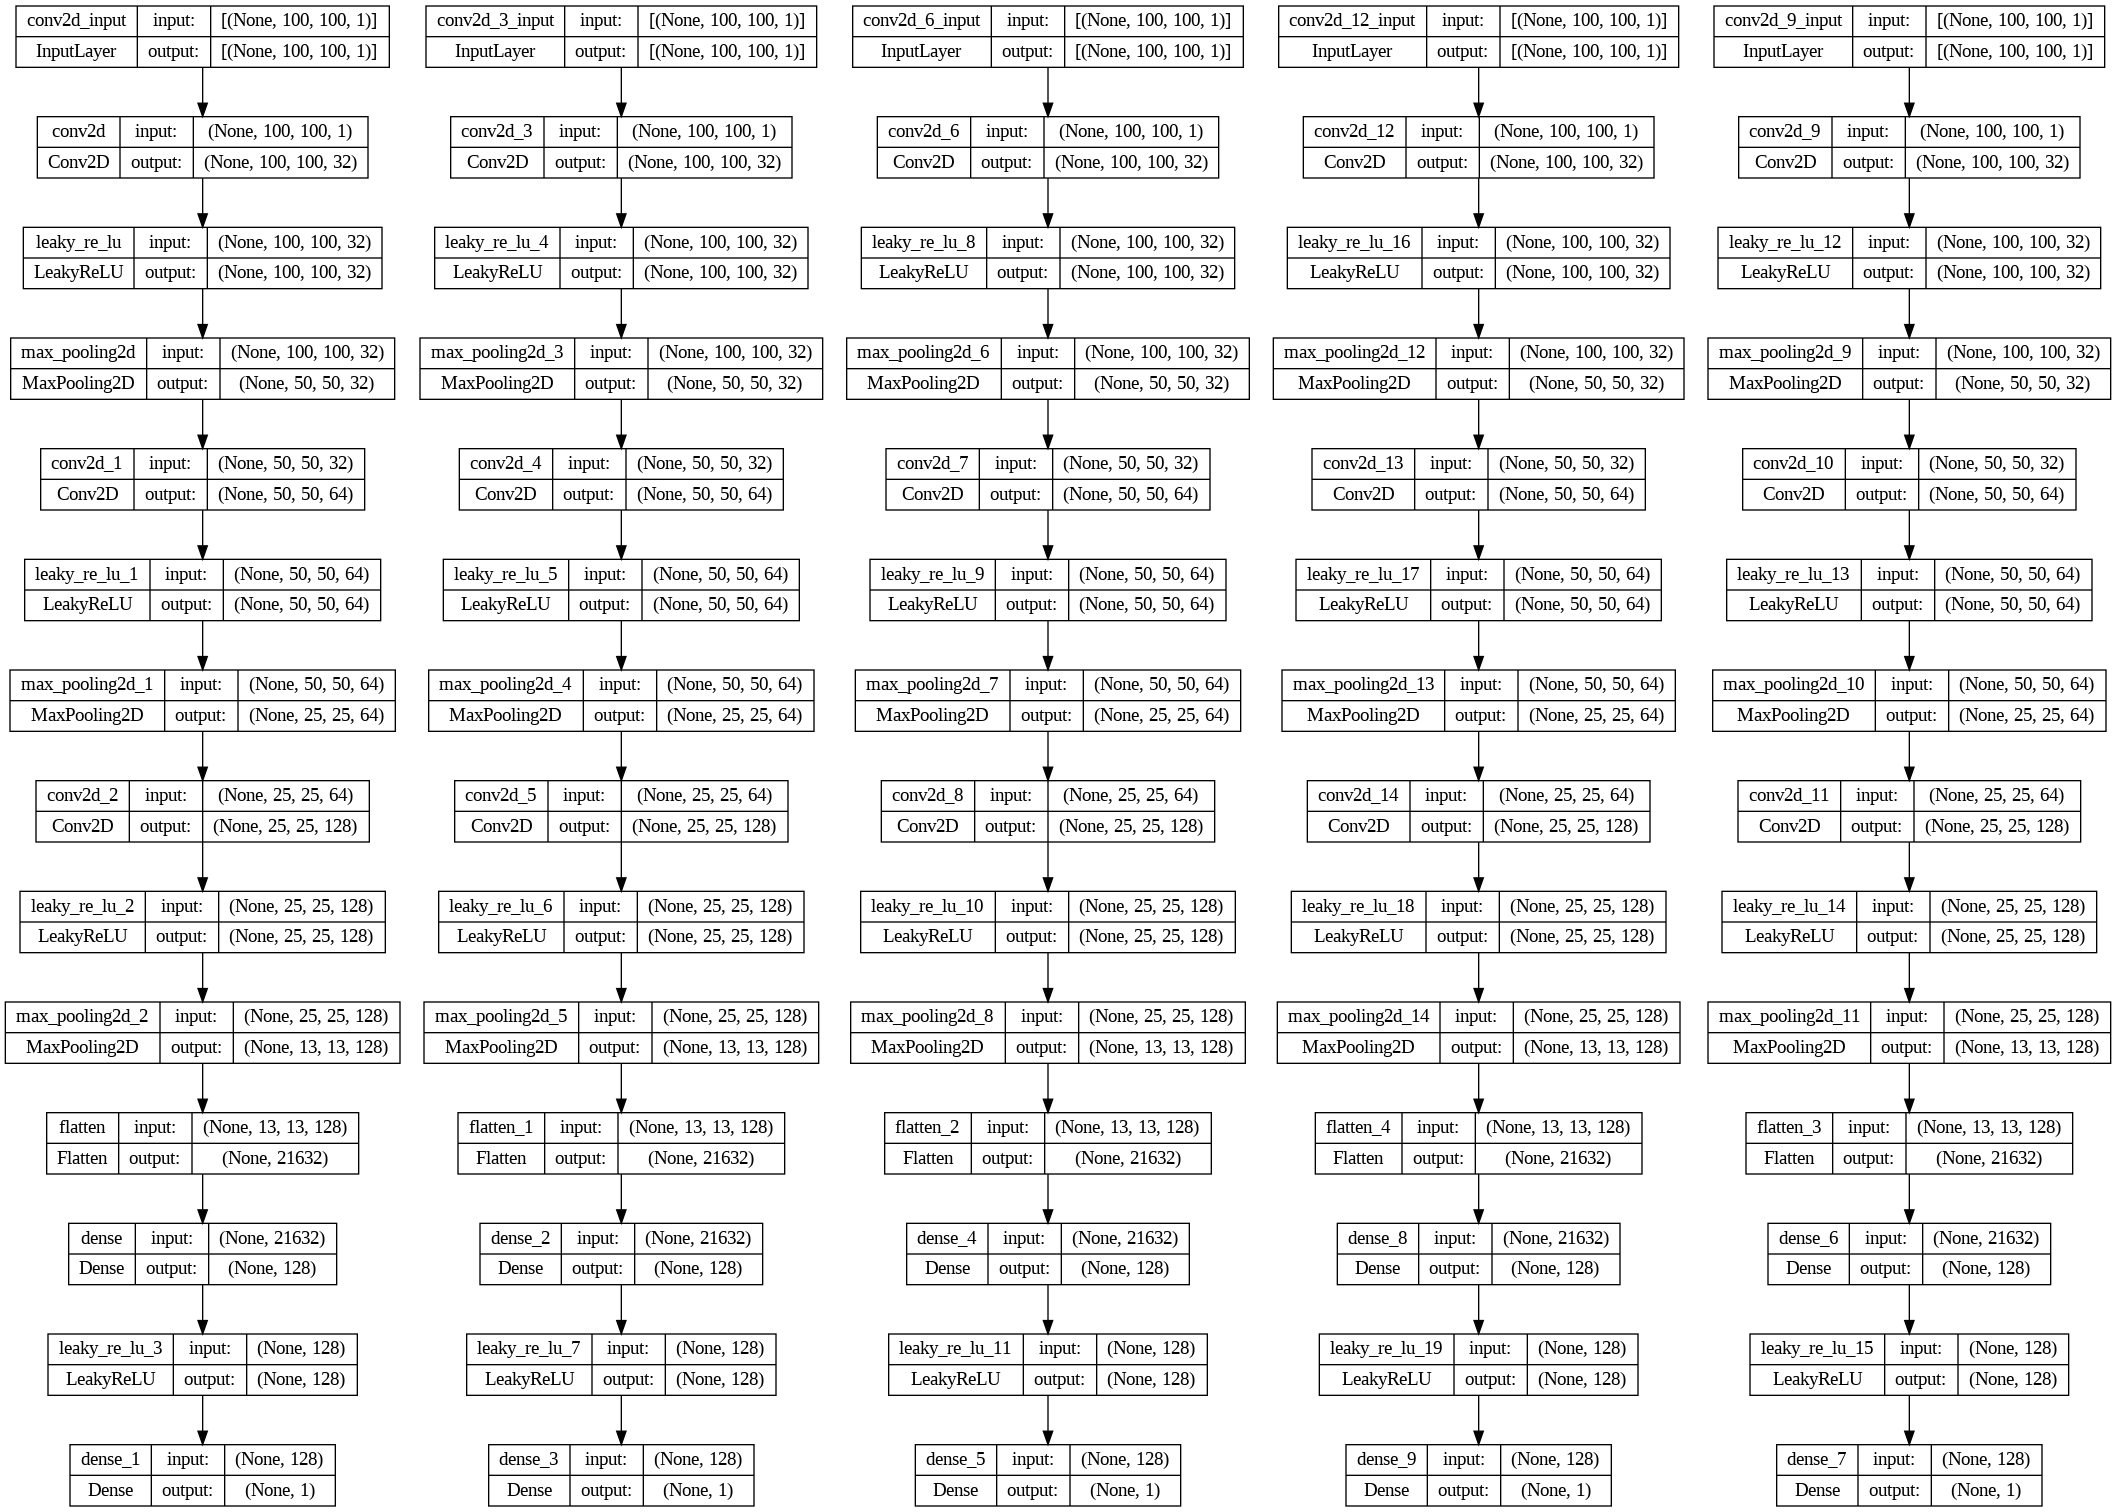

In [17]:
keras.utils.plot_model(model, "cnn_mimo_model.png", show_shapes=True)

In [18]:
import PIL

In [21]:
size = 100
fwhm = 15
x = np.arange(0, size, 1, float)
y = x[:,np.newaxis]
x0 = y0 = size // 2
x = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
x = (x * 255).astype(int)
print('SHAPE', x.shape)

SHAPE (100, 100)


In [24]:
import matplotlib.pyplot as plt


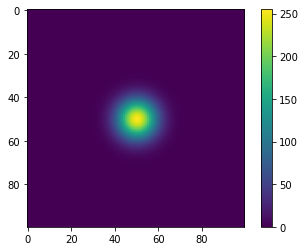

In [27]:
c = plt.imshow(x)
plt.colorbar(c)

In [29]:
im = x.reshape((-1,100, 100, 1))
im.shape

(1, 100, 100, 1)

In [37]:
preds = model.predict([im]*5, verbose=0)
preds_dc = {k:pred[0,0] for k, pred in zip(classes, preds)}
preds_dc

{'good': 1.0, 'LOW_SNR': 1.0, 'HIGH_RFI': 0.0, 'BAD_SHAPE': 0.0, 'NO_SRC': 0.0}

In [38]:
[k for k,v in preds_dc.items() if v > 0.25]

['good', 'LOW_SNR']